<a href="https://colab.research.google.com/github/jdug1981/proyecto_final/blob/main/Proyecto_BANKMARKETING_V1-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Vision_producto](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

#**PROYECTO INTEGRADOR FINAL: BANK TELEMARKETING**
El objetivo es predecir si un cliente se suscribirá a un depósito a plazo fijo que se le ofrece mediante una campaña de telemarketing.

Para ello se propone crear un modelo de clasificación de aprendizaje automático con la finalidad poder usarlo en una población definida por un banco minorista de Portugal en el contexto de la recesión global del año 2008.
[Link Product Vision Board](https://github.com/jdug1981/proyecto_final/blob/main/PRODUCT%20VISION%20BOARD.png?raw=true)

## **DESCRIPCION DE LOS DATOS**
**1. Información Importante:**

Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder saber si el cliente se suscribiría a un depósito a plazo fijo.





**2. Objetivo:**

El objetivo es diseñar un modelo de clasificación para predecir si el cliente suscribirá un depósito a plazo (variable y).

**3. Número de Instancias:**

45211 for bank-full.csv (4521 for bank.csv)

**4. Número de atributos:**

 16 varaibles de entrada

 1 variable de salida o variable Objetivo


**5. Información sobre las Variables:**

**Variables de Entrada**
1. age: Edad del cliente (numérico).

2. job: Tipo de empleo del cliente (categórico): "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services".

3. marital: Estado civil del cliente (categórico): "married", "divorced", "single" (Nota: "divorced" significa divorciado o viudo).

4. education: Nivel de educación del cliente (categórico): "unknown", "secondary", "primary", "tertiary".

5. default: ¿Tiene el cliente crédito en mora? (binario): "yes", "no".

6. balance: Saldo promedio anual, en euros, del cliente (numérico).

7. housing: ¿Tiene el cliente un préstamo hipotecario? (binario): "yes", "no".

8. loan: ¿Tiene el cliente un préstamo personal? (binario): "yes", "no".

9. contact: Tipo de comunicación de contacto (categórico) relacionado con el último contacto de la campaña actual: "unknown", "telephone", "cellular".

10. day: Último día del mes en que se realizó el último contacto (numérico).

11. month: Último mes del año en que se realizó el último contacto (categórico): "jan", "feb", "mar", ..., "nov", "dec".

12. duration: Duración del último contacto en segundos (numérico).

13. campaign: Número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto).

14. pdays: Número de días transcurridos desde el último contacto de una campaña anterior con el cliente (numérico, -1 significa que el cliente no fue contactado anteriormente).

15. previous: Número de contactos realizados antes de esta campaña y para este cliente (numérico).

16. poutcome: Resultado de la campaña de marketing anterior (categórico): "unknown", "other", "failure", "success".

**Variable objetivo (target deseado):**

17. y: ¿El cliente ha suscrito un depósito a plazo? (binario): "yes", "no".



**6. Missing Attribute Values:**

None


In [2]:
# Definición de Librerias
!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import ydata_profiling
import matplotlib.pyplot as plt
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=602e988336e3647bde40fedb11e87e9ccc56add54bf180ca6c7cc357b51b0c59
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

# 1. Leyendo y explorando data

In [3]:
mainpath = "bank_full.csv"
data = pd.read_csv(mainpath,sep=";")

In [4]:
# Contar los datos:
print(data.shape)
# Validar la data de forma general
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- Evalueamos la completitud de la información para el adecuado procesamiento de los datos

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Observaciones:**

La muestra tiene:

45,211 instancias

17 variables ( columnas).

  - 10 variables categóricas

  - 7 variables numéricas

La variable Objetivo es categorica binaria: yes / no

No hay valores missing

# 1.1 Análisis de la Variable Objetivo (y)
¿El cliente invirtió en un depósito a plazo fijo? : yes / no


In [8]:
#La variable Objetivo de tipo categórica se mapea en 0=no , yes=1
data["y"].unique()
data["y"]=data["y"].map({'no':0, 'yes':1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


<Axes: xlabel='y', ylabel='count'>

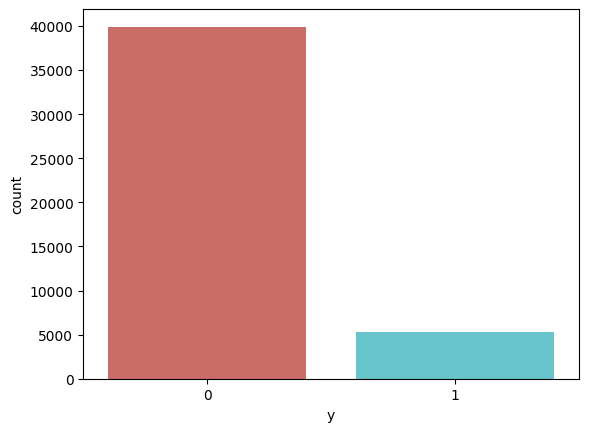

In [9]:
# Analizando la distribución de la variable objetivo.
sns.countplot(x='y', data = data, palette = 'hls')

In [10]:
#Media de la variable objetivo

print("Media de Y: ", data.y.mean(). round(3))
# Distribución de frecuencias de las respuestas a la suscripción de depósitos a plazo fijo (y)
frecuencias = data.groupby('y').agg({'y': ['count',  lambda x: 100*x.size/len(data)]})
frecuencias.columns = ['fi', 'hi%']
print("\nDistribución de frecuencias")
frecuencias


Media de Y:  0.117

Distribución de frecuencias


,fi,hi%
y,,
0,39922,88.30152
1,5289,11.69848


**Se observó:**

1. *La variable objetivo es Categórica binaria.*  Por lo tanto, para el modelo de clasificación se codificó así:

> 0='no'   No se suscribió a un depósito a plazo fijo.

> 1='yes'  Si se suscribió a un depósito a plazo fijo.

2. La Distribucipon de frecuencias de la variable objetiva nos muestra una data desbalanceada. 88.3% de la muestra no se suscribió a un depósito a plazo fijo. Esto se puede explicar por la desconfianza en el banco minorista dada la crisis del sistema financiero de Portugal el contexto de la crisis financiera del 2008.

3. La media 0.117, nos indica que en promedio se suscribieron 12 de cada 100. Lo cual es bajo dado el desbalanceo de la data.


# 1.1. Análisis de las variables categóricas

In [11]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = data.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
categorical_columns =data.select_dtypes(include=['object'])
categorical_columns.describe().transpose()

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


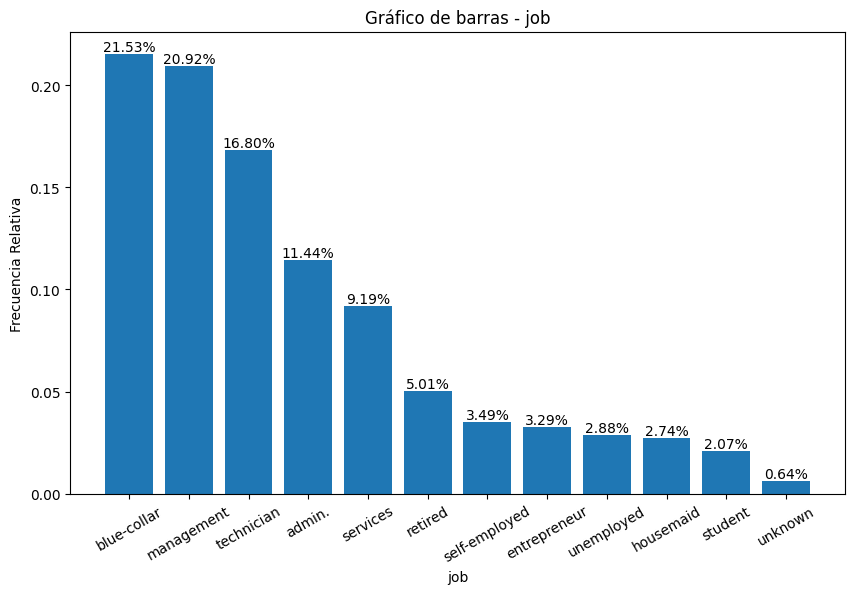

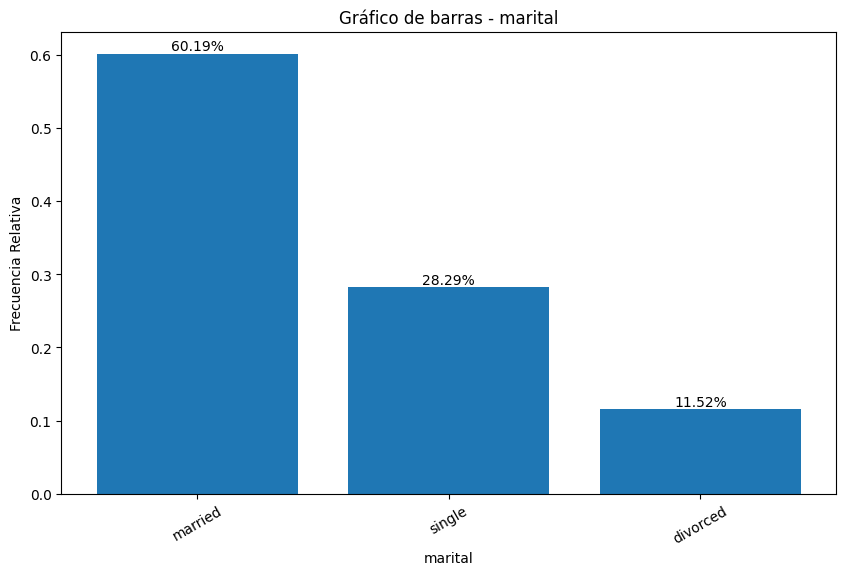

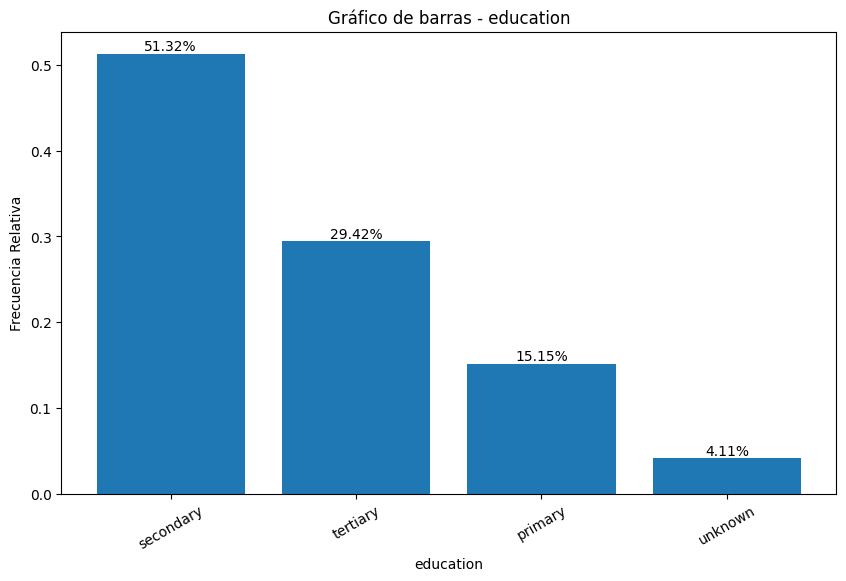

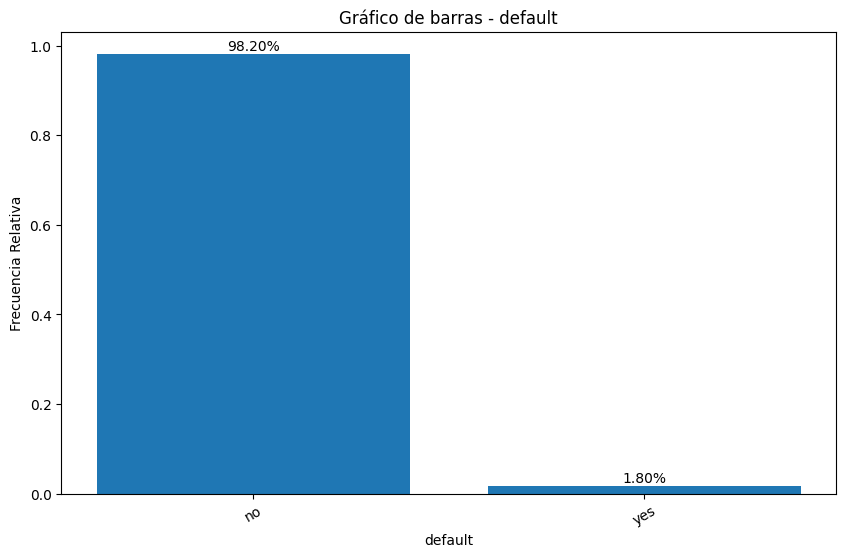

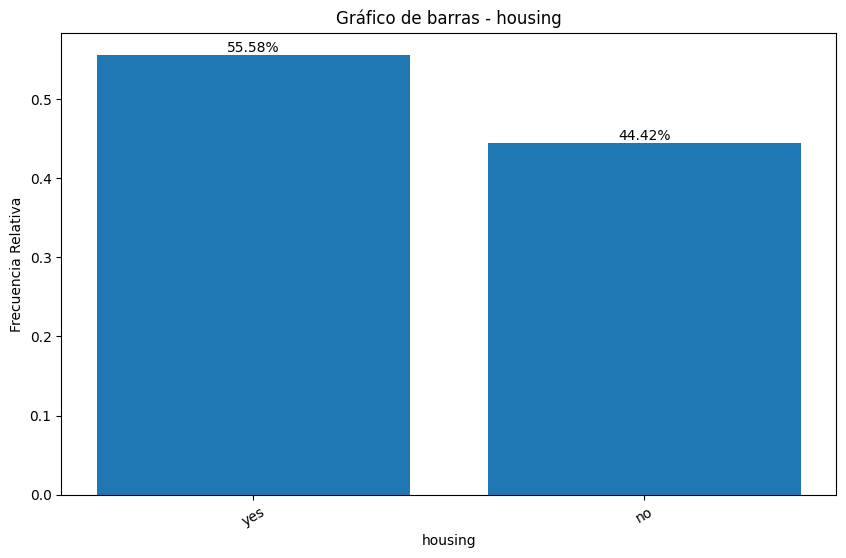

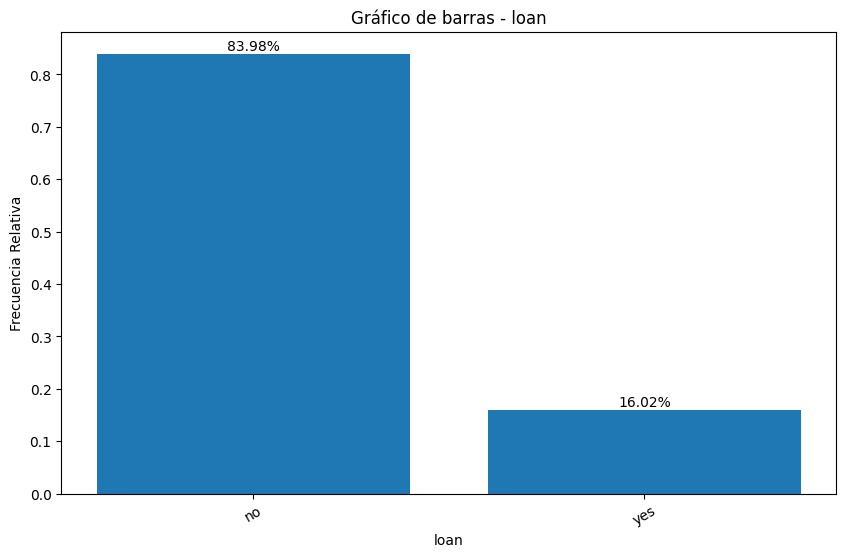

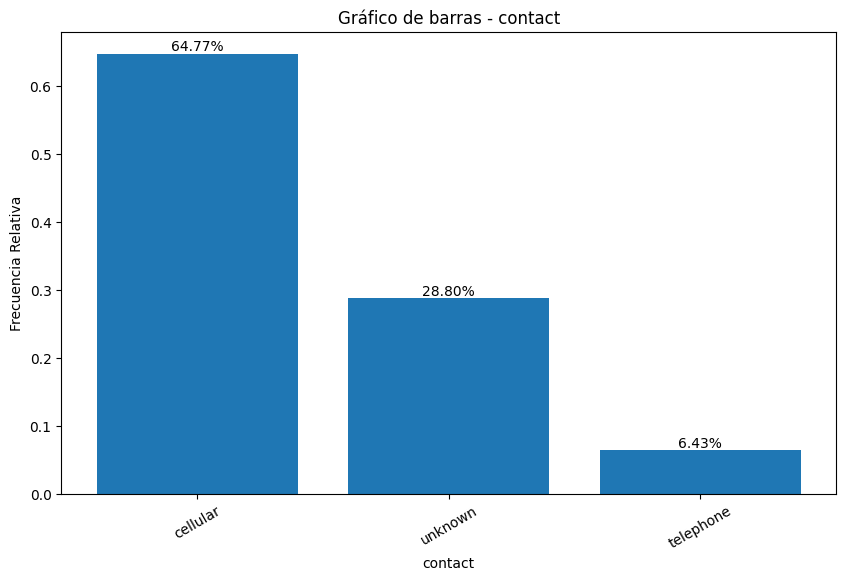

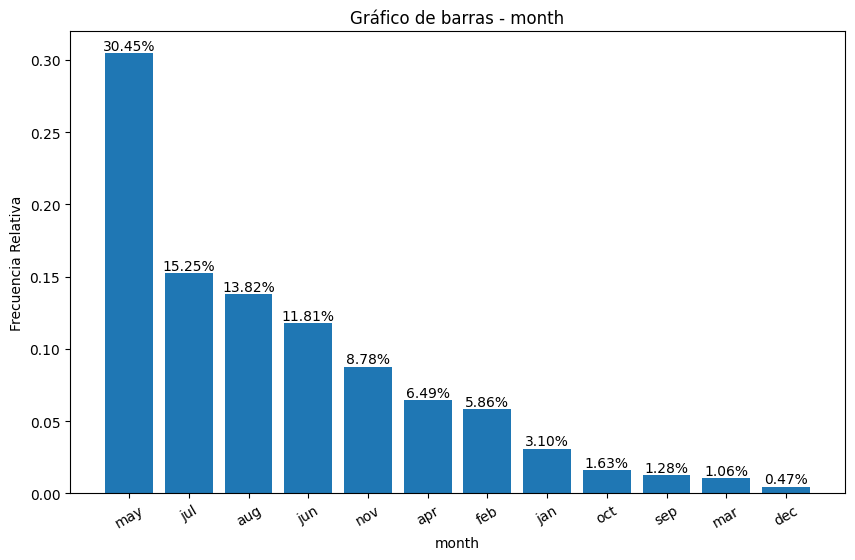

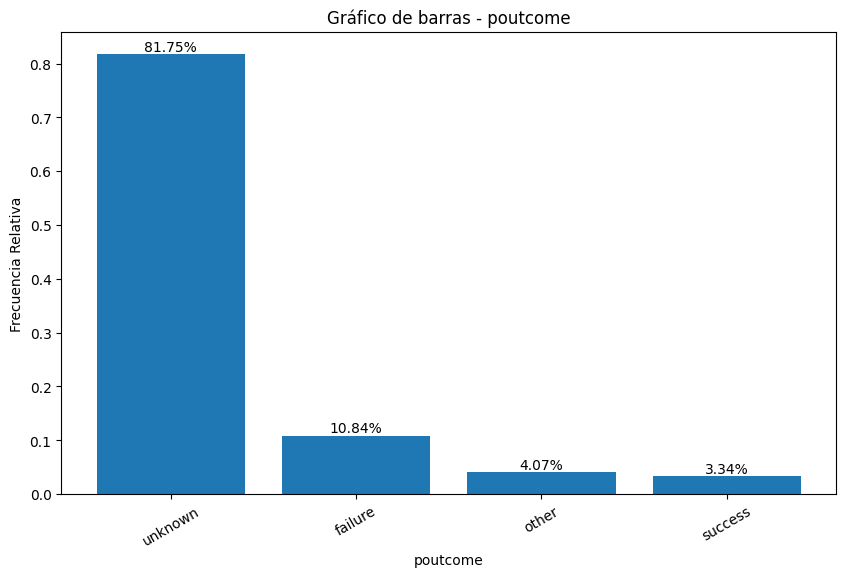

In [13]:
for column in categorical_columns:
    category_counts = data[column].value_counts(normalize=True)  # Calcular las frecuencias relativas
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frecuencia Relativa')
    plt.title(f"Gráfico de barras - {column}")
    plt.xticks(rotation=30)

    # Mostrar las frecuencias relativas en las etiquetas de las barras
    for i, v in enumerate(category_counts.values):
        plt.text(i, v, f'{v:.2%}', ha='center', va='bottom')

    plt.show()

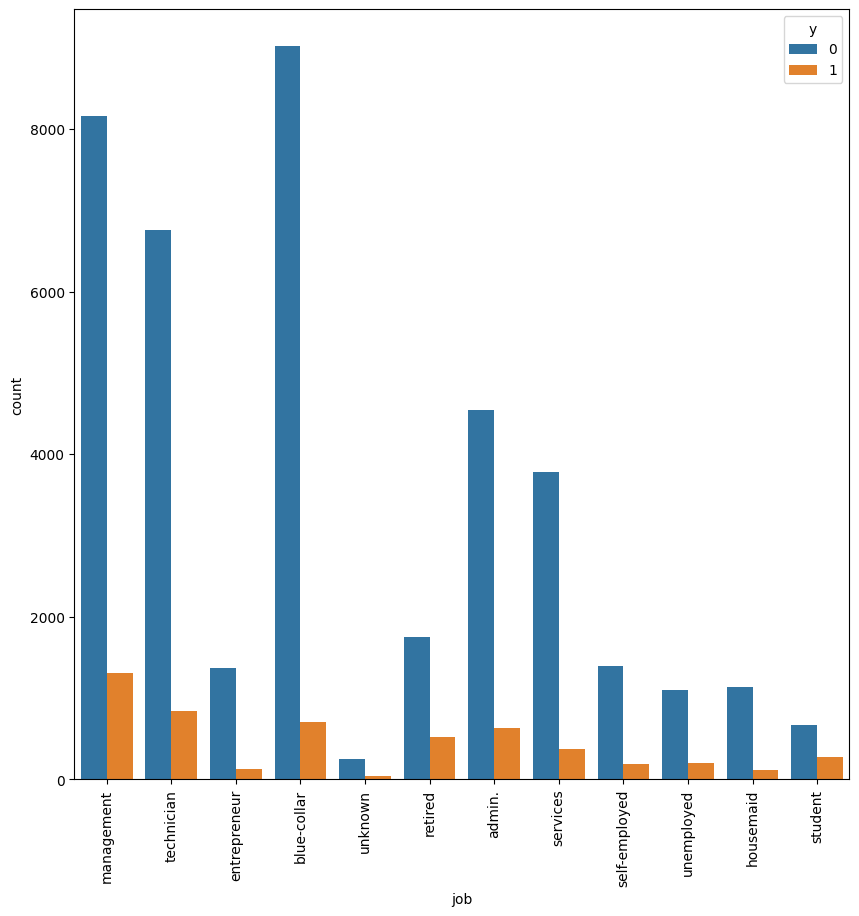

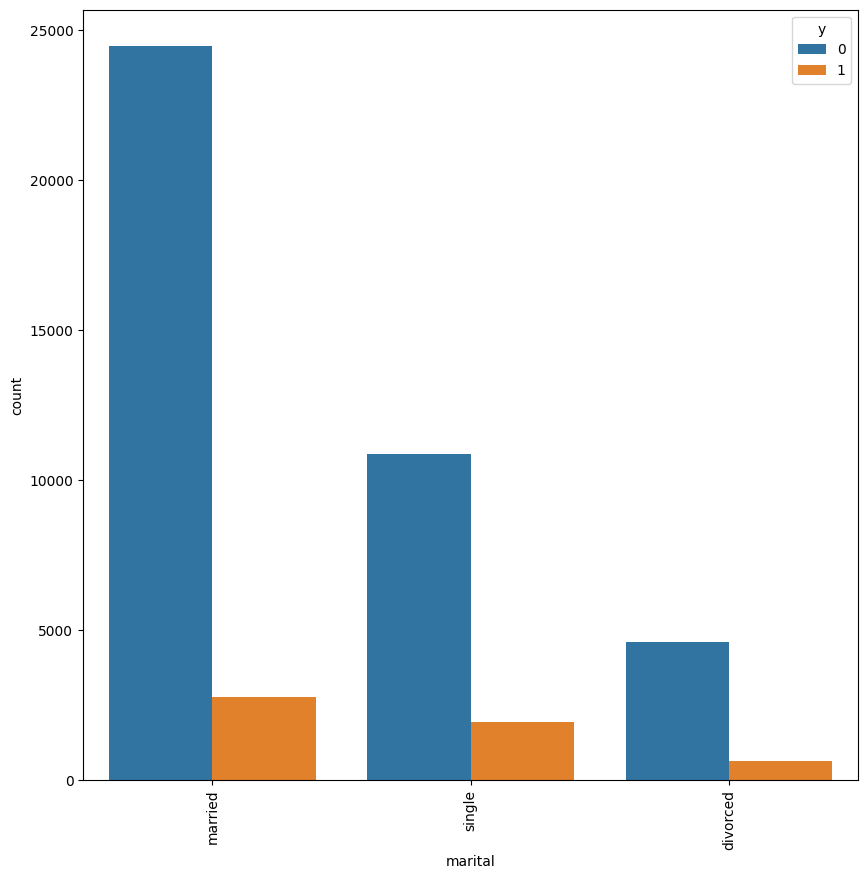

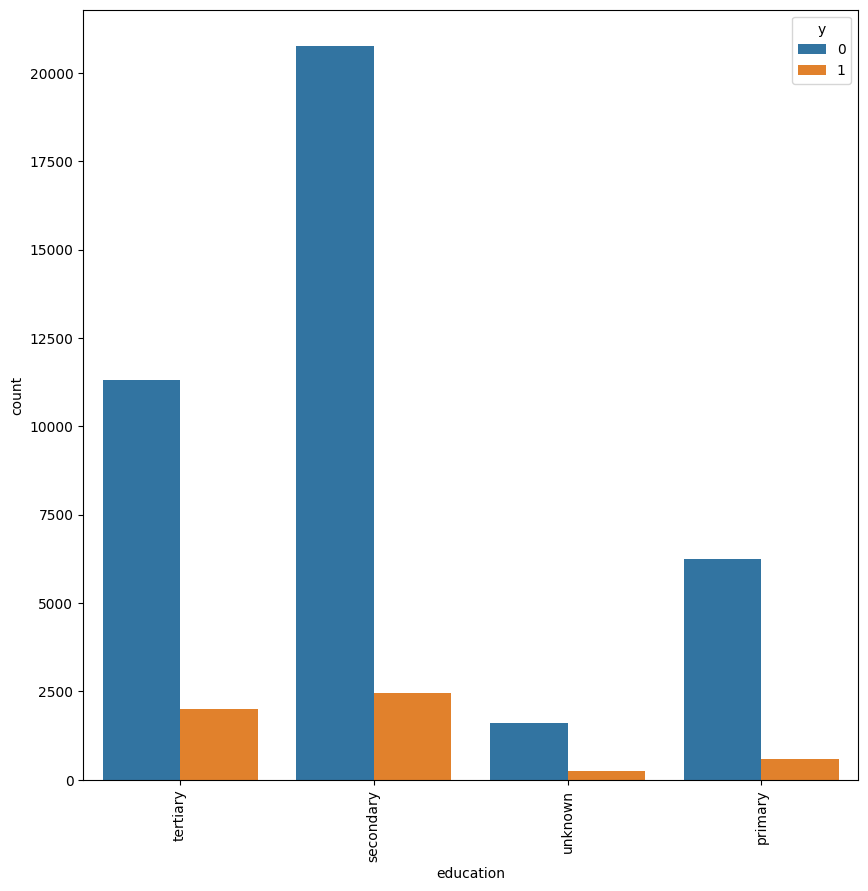

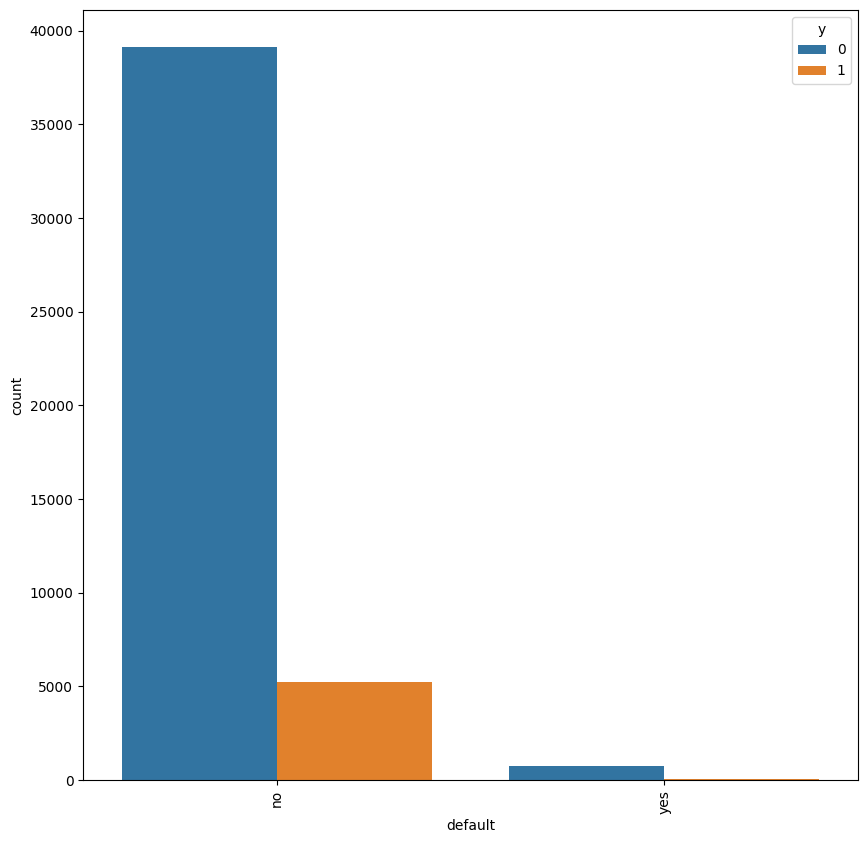

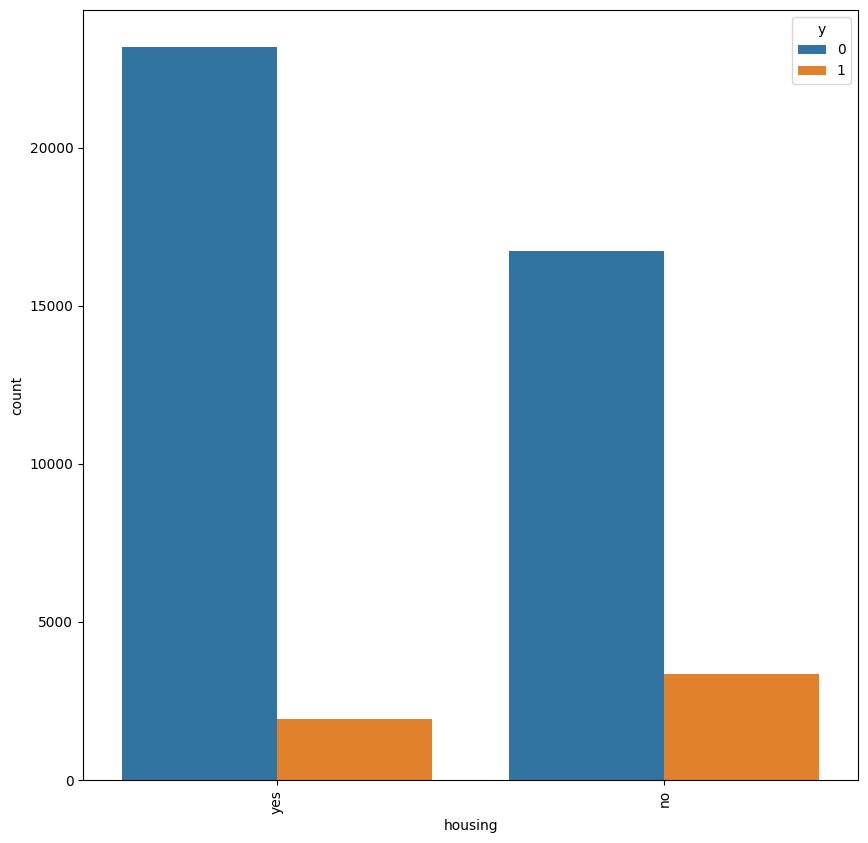

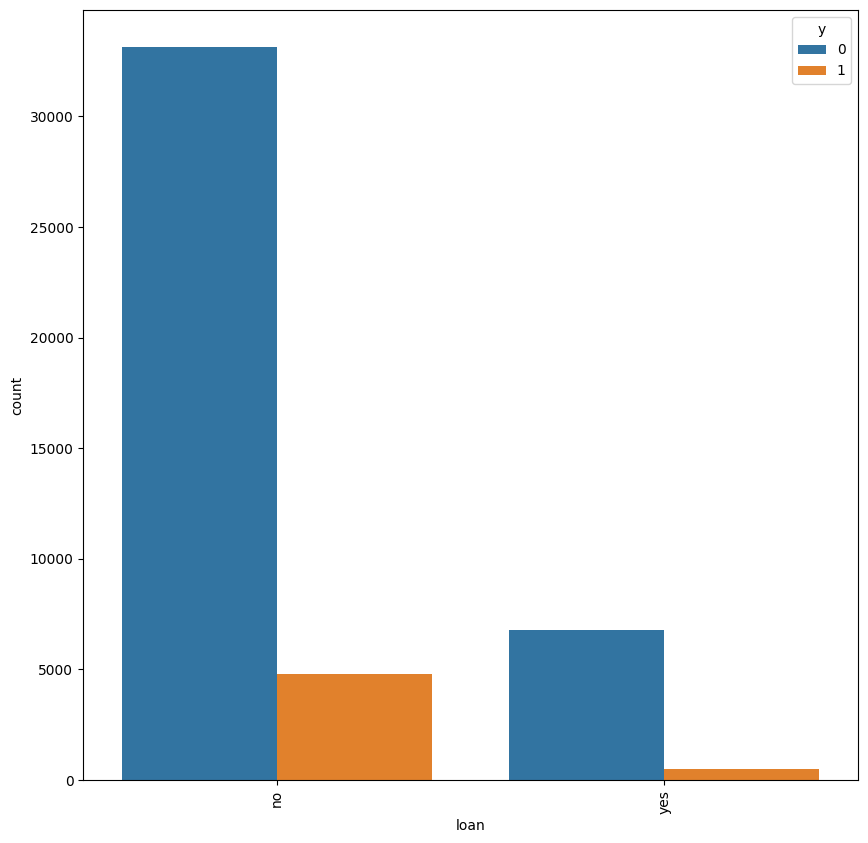

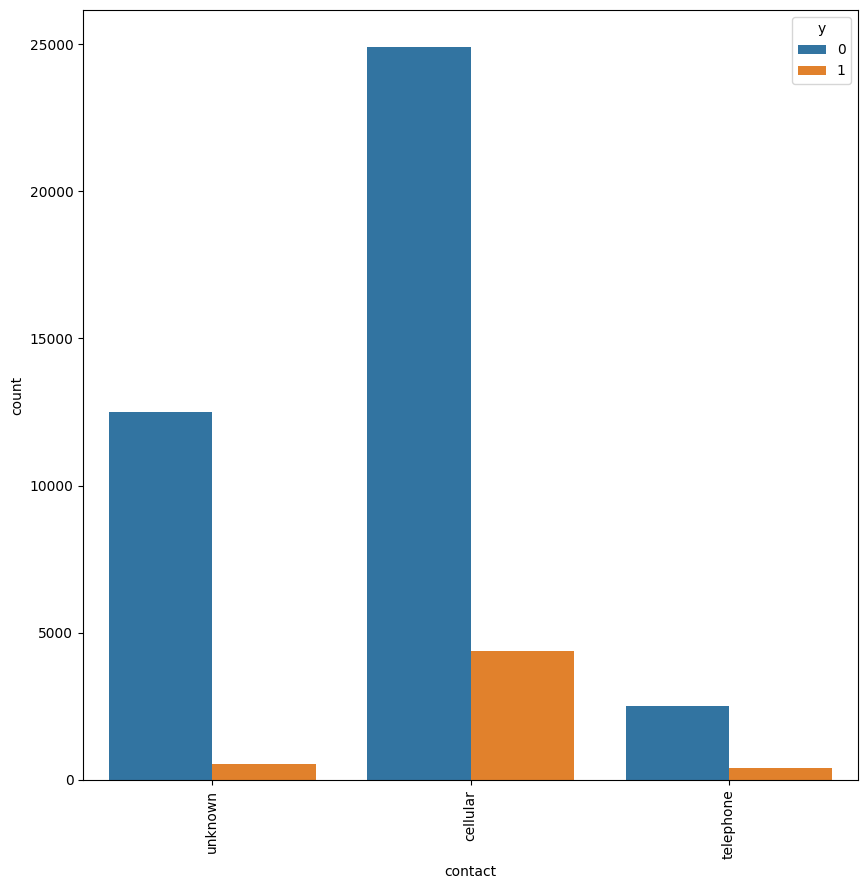

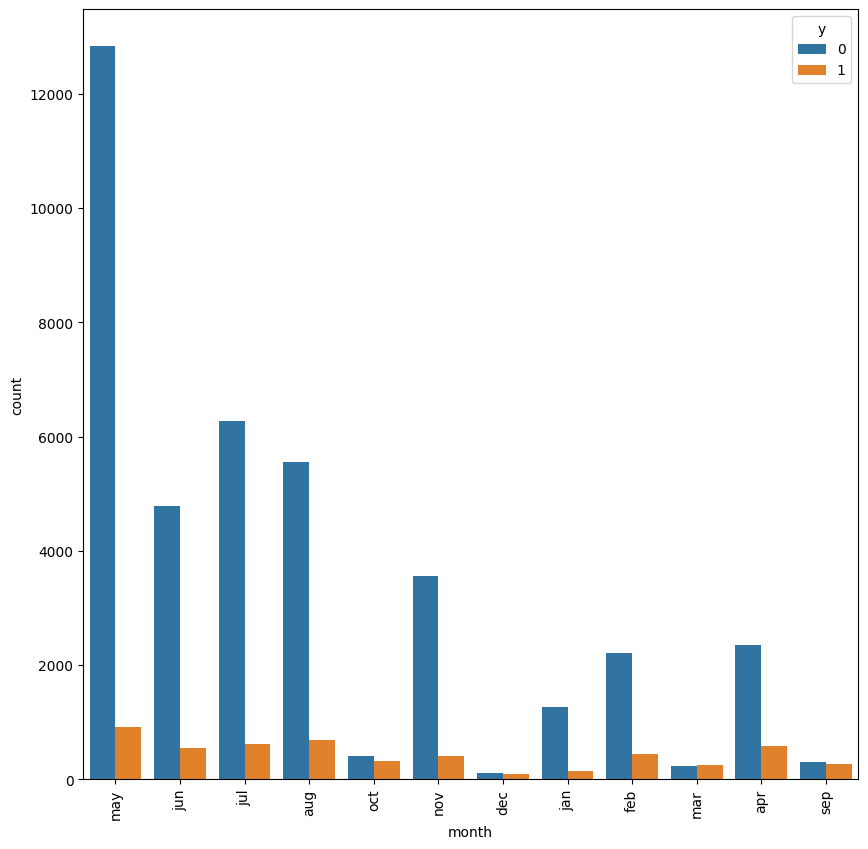

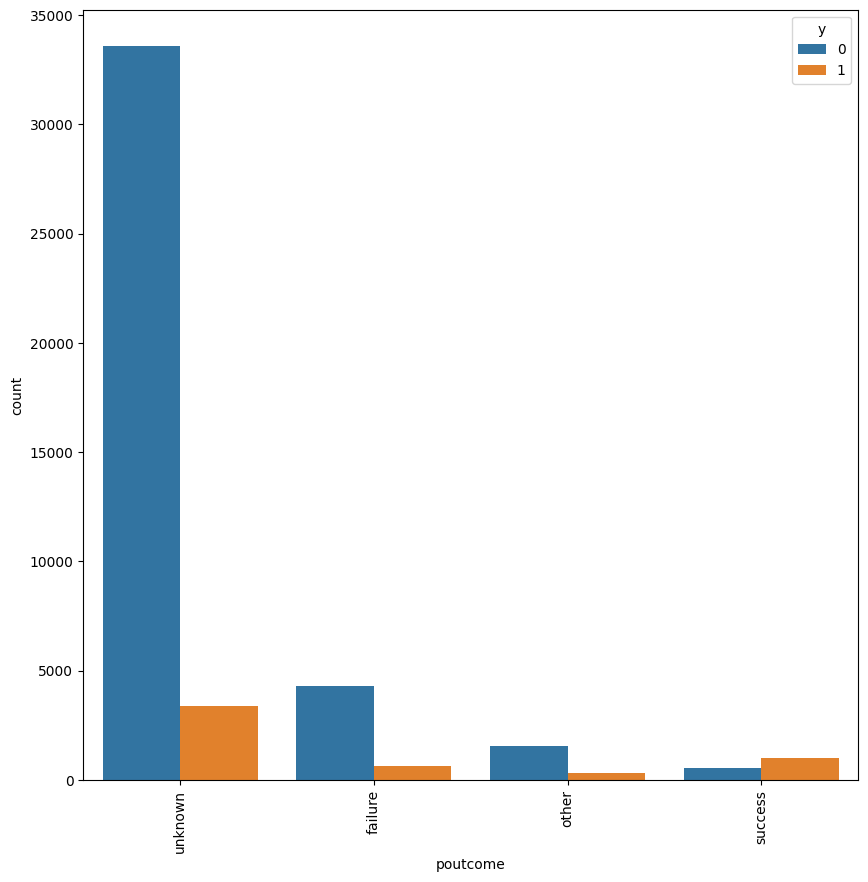

In [14]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=data, x=column,hue='y')
    plt.xticks(rotation='vertical')
    plt.show()

column_cat = data.select_dtypes(include='object').columns

for _ in column_cat:
    plot_categorial(_)

**Análisis de la relación entre variables categóricas y una variable objetivo**

 Tabla de contingencia.

In [15]:
#Exploración de variables categóricas
# Con este análisis detectamos las relaciones que puede tener c/u de las variables vs la variable objetivo.
for column in categorical_columns:
  print("\n")
  print(data.groupby(column).agg(count=('y', 'count'), hi=('y', 'mean')).sort_values(by="hi", ascending=False))




               count        hi
job                           
student          938  0.286780
retired         2264  0.227915
unemployed      1303  0.155027
management      9458  0.137556
admin.          5171  0.122027
self-employed   1579  0.118429
unknown          288  0.118056
technician      7597  0.110570
services        4154  0.088830
housemaid       1240  0.087903
entrepreneur    1487  0.082717
blue-collar     9732  0.072750


          count        hi
marital                  
single    12790  0.149492
divorced   5207  0.119455
married   27214  0.101235


           count        hi
education                 
tertiary   13301  0.150064
unknown     1857  0.135703
secondary  23202  0.105594
primary     6851  0.086265


         count        hi
default                 
no       44396  0.117961
yes        815  0.063804


         count        hi
housing                 
no       20081  0.167024
yes      25130  0.077000


      count        hi
loan                 
no    37967  0.126

**Se observó:**
Analizando la relación de las variables categóricas con la variable objetivo (y), tenemos:

1. En **Job:** La categoría "*student*" tiene la mayor probabilidad (28.7%) de suscribir un depósito a plazo fijo.
2. En **marital:** La categoría "*single*" tiene la mayor probabilidad (14.9%) de suscribir un depósito a plazo fijo.     
3. En **education:** La categoría "*tertiary*" tiene la mayor probabilidad (15%) de suscribir un depósito a plazo fijo.
4. En **Housing**    La categoría "no" tiene la mayor probabilidad (0.167024) de suscribir un depósito a plazo fijo      
5. En **loan** , La categoría "no" tiene la mayor probabilidad (0.126557) de suscribir un depósito a plazo fijo.
6. En **default** , La categoría "no" tiene la mayor probabilidad (0.117961) de suscribir un depósito a plazo fijo.



# 1.2 Análisis de la variable numérica

In [16]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
variables_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [17]:
#variables_numericas.remove(target)
variables_numericas.remove('y')

In [18]:
variables_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
numeric_columns = data.select_dtypes(include=['int64', 'float'])
numeric_columns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


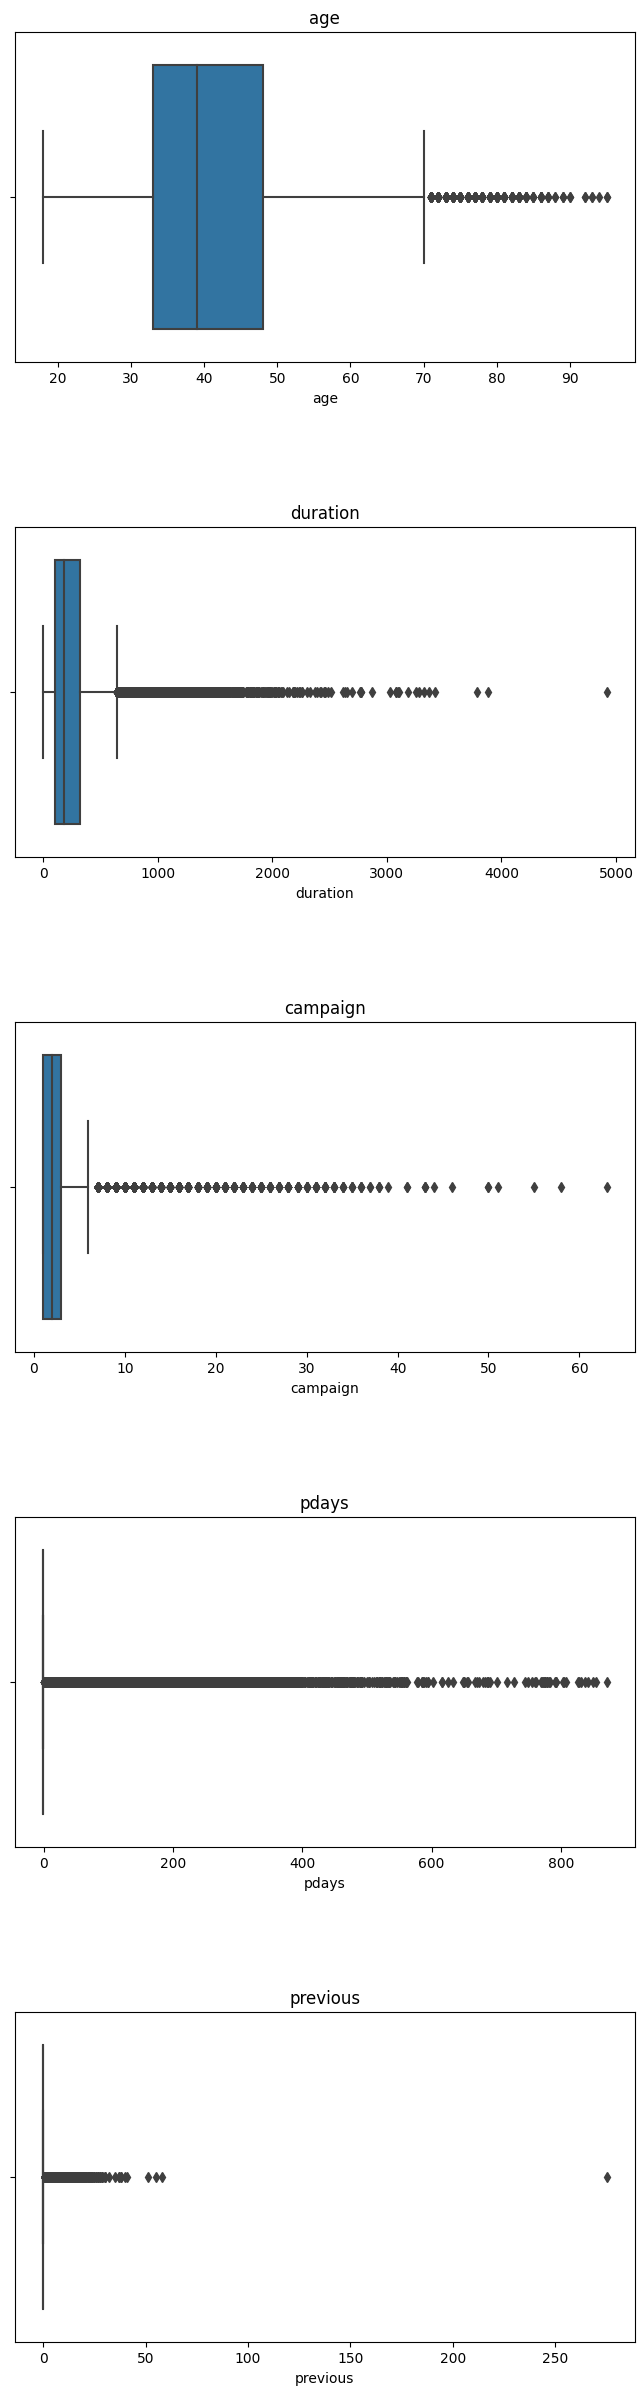

In [20]:
# Generar gráficas individuales boxplot pues las variables numéricas.
# están en rangos diferentes
cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

# 2. Selección de muestras

In [21]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data['y'],
                               train_size=0.7,
                               random_state=234)

**stratify** nos permite mantener la misma proporción del balance de datos originales de la muestra

In [22]:
print(f"Tamaño del total de datos: {len(data)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 45211
Tamaño de train: 31647
Tamaño de test: 13564


# 3. Pre selección de variables

In [23]:
# Dando formato a nuestra tabla resumen
pdResume = train.describe().transpose()
# Ahora el nuevo index será el campo "feature"
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)

pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)

pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,age,31647.0,40.913831,10.586358,18.0,33.0,39.0,48.0,95.0,0.0
1,balance,31647.0,1374.377034,3087.626646,-8019.0,71.0,451.0,1438.0,102127.0,0.0
2,day,31647.0,15.808260,8.335407,1.0,8.0,16.0,21.0,31.0,0.0
3,duration,31647.0,258.358043,258.128869,0.0,103.0,180.0,319.0,4918.0,0.0
4,campaign,31647.0,2.762442,3.066837,1.0,1.0,2.0,3.0,51.0,0.0
5,pdays,31647.0,39.619111,99.384755,-1.0,-1.0,-1.0,-1.0,871.0,0.0
6,previous,31647.0,0.566499,1.870244,0.0,0.0,0.0,0.0,51.0,0.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# Se ejecuta este comando, pero en realidad como la data ya está trabajada o sin na, entonces no se elimina ningún registro
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [25]:
# Conteo de los niveles en las diferentes columnas categóricas:
# Como se verá en su ejecución, todas las variables categóricas poseen mas de 1 subnivel, por tal motivo no podremos a primera vista, eliminar alguna columna.
cols_cat = ['job','marital','education','default','housing','loan','contact','day','y']


In [26]:
# Hemos validado que hay filas repetidas...Se eliminarán 12 filas.
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45211, 17)
Tamaño del set después de eliminar las filas repetidas: (45211, 17)


# 4. Tratamiento de variables

In [27]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [28]:
# Tratamiento de outliers por RIC

# Calculando los intervalos RIC

pdResume['ric'] = pdResume['Q3'] - pdResume['Q1']

pdResume['min_ric'] = pdResume['Q1'] - 1.5*pdResume['ric']
pdResume['max_ric'] = pdResume['Q3'] + 1.5*pdResume['ric']

pdResume.head(10)

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,ric,min_ric,max_ric
0,age,31647.0,40.913831,10.586358,18.0,33.0,39.0,48.0,95.0,0.0,15.0,10.5,70.5
1,balance,31647.0,1374.377034,3087.626646,-8019.0,71.0,451.0,1438.0,102127.0,0.0,1367.0,-1979.5,3488.5
2,day,31647.0,15.808260,8.335407,1.0,8.0,16.0,21.0,31.0,0.0,13.0,-11.5,40.5
3,duration,31647.0,258.358043,258.128869,0.0,103.0,180.0,319.0,4918.0,0.0,216.0,-221.0,643.0
4,campaign,31647.0,2.762442,3.066837,1.0,1.0,2.0,3.0,51.0,0.0,2.0,-2.0,6.0
5,pdays,31647.0,39.619111,99.384755,-1.0,-1.0,-1.0,-1.0,871.0,0.0,0.0,-1.0,-1.0
6,previous,31647.0,0.566499,1.870244,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
# Tratamiento de outliers por RIC

for col in pdResume.feature.tolist():
  desc = pdResume.loc[pdResume.feature == col]

  lower_limit = desc.min_ric.values[0]
  upper_limit = desc.max_ric.values[0]
  if col!='y':
    train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
    test[col + '_tric'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)



train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 18632 to 4398
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            31647 non-null  int64  
 1   job            31647 non-null  object 
 2   marital        31647 non-null  object 
 3   education      31647 non-null  object 
 4   default        31647 non-null  object 
 5   balance        31647 non-null  int64  
 6   housing        31647 non-null  object 
 7   loan           31647 non-null  object 
 8   contact        31647 non-null  object 
 9   day            31647 non-null  int64  
 10  month          31647 non-null  object 
 11  duration       31647 non-null  int64  
 12  campaign       31647 non-null  int64  
 13  pdays          31647 non-null  int64  
 14  previous       31647 non-null  int64  
 15  poutcome       31647 non-null  object 
 16  y              31647 non-null  int64  
 17  age_tric       31647 non-null  float64
 18  bal

Se agregó nuevas columnas del 17 al 23, con col+_tric

In [30]:
variables_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [31]:

variables_numericas_ric = [x + '_tric' for x in variables_numericas]
variables_numericas_ric

['age_tric',
 'balance_tric',
 'day_tric',
 'duration_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric']

4.2 Tratamiento de Variables Categóricas

In [32]:
if 'job' in train.columns.tolist():
  print(train['job'].value_counts())

blue-collar      6721
management       6661
technician       5337
admin.           3623
services         2922
retired          1581
self-employed    1123
entrepreneur     1034
unemployed        928
housemaid         863
student           645
unknown           209
Name: job, dtype: int64


In [33]:
# Mapear las categorías a los nuevos valores
mapping = {
    'management': 'Estable',
    'services': 'Inestable',
    'blue-collar': 'Inestable',
    'technician': 'Moderado',
    'entrepreneur': 'Moderado',
    'student': 'Variable',
    'retired': 'Estable',
    'admin.': 'Estable',
    'housemaid': 'Inestable',
    'self-employed': 'Moderado',
    'unemployed': 'Inestable',
    'unknown': 'Variable'
}
if 'job' in train.columns.tolist():
  # EN TRAIN: Crear la nueva columna "financial-stability" utilizando el mapeo de categorías
    train['financial-stability'] = train['job'].map(mapping)

        # Eliminar la columna "JOB" si ya no es necesaria
    train.drop('job', axis=1, inplace=True)
# EN TEST: Crear la nueva columna "financial-stability" utilizando el mapeo de categorías
    test['financial-stability'] = test['job'].map(mapping)

# Eliminar la columna "JOB" si ya no es necesaria
    test.drop('job', axis=1, inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 18632 to 4398
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31647 non-null  int64  
 1   marital              31647 non-null  object 
 2   education            31647 non-null  object 
 3   default              31647 non-null  object 
 4   balance              31647 non-null  int64  
 5   housing              31647 non-null  object 
 6   loan                 31647 non-null  object 
 7   contact              31647 non-null  object 
 8   day                  31647 non-null  int64  
 9   month                31647 non-null  object 
 10  duration             31647 non-null  int64  
 11  campaign             31647 non-null  int64  
 12  pdays                31647 non-null  int64  
 13  previous             31647 non-null  int64  
 14  poutcome             31647 non-null  object 
 15  y                    31647 non-nu

In [35]:
if 'job' not in train.columns.tolist():
  print(train['financial-stability'].drop_duplicates())

18632    Inestable
23090     Moderado
23334      Estable
44015     Variable
Name: financial-stability, dtype: object


La variable Job ha sido recategorizada en la nueva variable fiancial-stability.

In [36]:
variables_categoricas = train.select_dtypes(include=['object']).columns.tolist()

print("Lista de Variables Categóricas: ",variables_categoricas,"\n")

Lista de Variables Categóricas:  ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'financial-stability'] 



In [37]:
# Tratamiento con Target Encoder
# Se trabajará una consolidación con la variable "job"
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist')
encoder.fit(train[variables_categoricas].astype('category'), train['y'])

TargetEncoder(cols=['marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome', 'financial-stability'],
              handle_unknown='infrequent_if_exist')

In [38]:
TargetEncoder(cols=['financial-stability',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month'],
              handle_unknown='infrequent_if_exist')

TargetEncoder(cols=['financial-stability', 'marital', 'education', 'default',
                    'housing', 'loan', 'contact', 'month'],
              handle_unknown='infrequent_if_exist')

In [39]:
train[[x + '_coded' for x in variables_categoricas]] = encoder.transform(train[variables_categoricas].astype('category'))
test[[x + '_coded' for x in variables_categoricas]] = encoder.transform(test[variables_categoricas].astype('category'))

In [40]:

train[['financial-stability', 'financial-stability_coded']].head(10)

,financial-stability,financial-stability_coded
18632,Inestable,0.085622
23090,Moderado,0.107019
5251,Moderado,0.107019
23334,Estable,0.144037
27744,Inestable,0.085622
15301,Moderado,0.107019
1514,Estable,0.144037
10496,Inestable,0.085622
384,Inestable,0.085622
14690,Inestable,0.085622


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 18632 to 4398
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        31647 non-null  int64  
 1   marital                    31647 non-null  object 
 2   education                  31647 non-null  object 
 3   default                    31647 non-null  object 
 4   balance                    31647 non-null  int64  
 5   housing                    31647 non-null  object 
 6   loan                       31647 non-null  object 
 7   contact                    31647 non-null  object 
 8   day                        31647 non-null  int64  
 9   month                      31647 non-null  object 
 10  duration                   31647 non-null  int64  
 11  campaign                   31647 non-null  int64  
 12  pdays                      31647 non-null  int64  
 13  previous                   31647 non-null  

## Análisis Univariado

In [42]:
categorical_features_coded = [x + '_coded' for x in variables_categoricas]
categorical_features_coded

['marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded']

In [43]:
univariate = train[variables_numericas_ric + categorical_features_coded].describe().transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '25%': 'Q1',
                             '50%' : 'median',
                            '75%': 'Q3'}, inplace = True)
univariate

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,age_tric,31647.0,40.846083,10.362827,18.000000,33.000000,39.000000,48.000000,70.500000,0.0
1,balance_tric,31647.0,940.950896,1188.413510,-1979.500000,71.000000,451.000000,1438.000000,3488.500000,0.0
2,day_tric,31647.0,15.808260,8.335407,1.000000,8.000000,16.000000,21.000000,31.000000,0.0
3,duration_tric,31647.0,235.074731,177.150633,0.000000,103.000000,180.000000,319.000000,643.000000,0.0
4,campaign_tric,31647.0,2.390843,1.598883,1.000000,1.000000,2.000000,3.000000,6.000000,0.0
5,pdays_tric,31647.0,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
6,previous_tric,31647.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,marital_coded,31647.0,0.116978,0.021594,0.100620,0.100620,0.100620,0.149648,0.149648,0.0
8,education_coded,31647.0,0.116978,0.023252,0.083944,0.106541,0.106541,0.148891,0.148891,0.0
9,default_coded,31647.0,0.116978,0.007890,0.059028,0.118052,0.118052,0.118052,0.118052,0.0


In [46]:
print(len(univariate.feature.tolist()))
univariate.feature.tolist()

16


['age_tric',
 'balance_tric',
 'day_tric',
 'duration_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded']

<Axes: xlabel='age'>

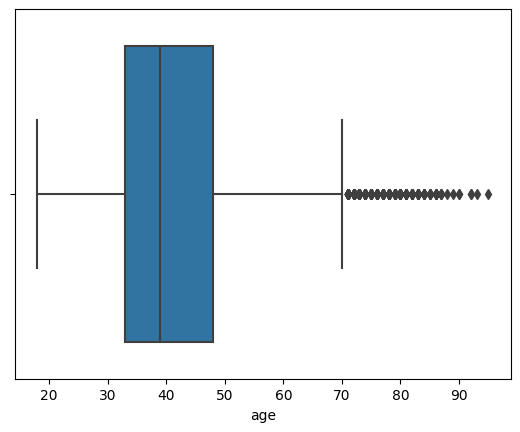

In [47]:
sns.boxplot(x = train.age)

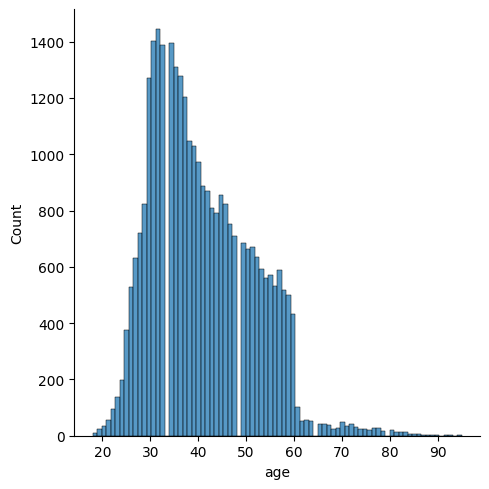

In [48]:
sns.displot(x = train.age)

<Axes: xlabel='age_tric'>

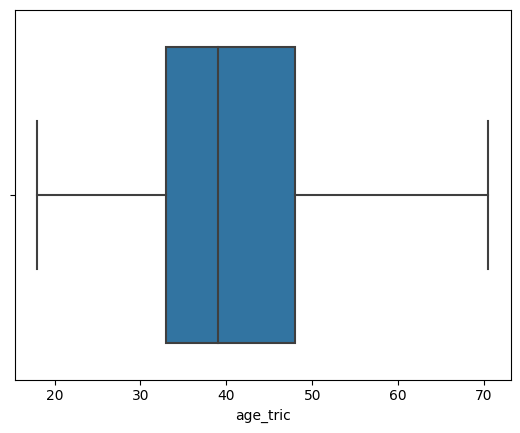

In [49]:
sns.boxplot(x = train.age_tric)

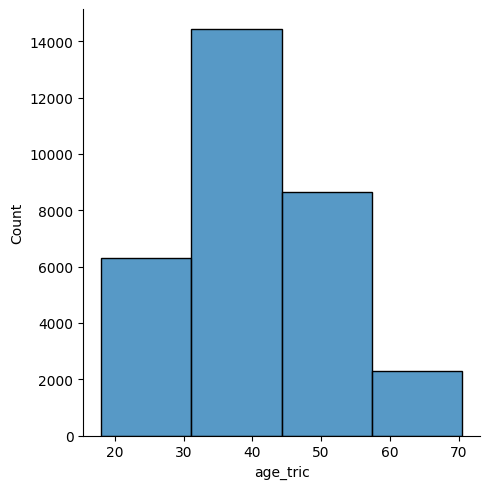

In [50]:
sns.displot(x = train.age_tric, bins=4)

### Análisis Bivariado

<ipython-input-51-aa3cc1da2b94>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='age_tric_rango', ylabel='y'>

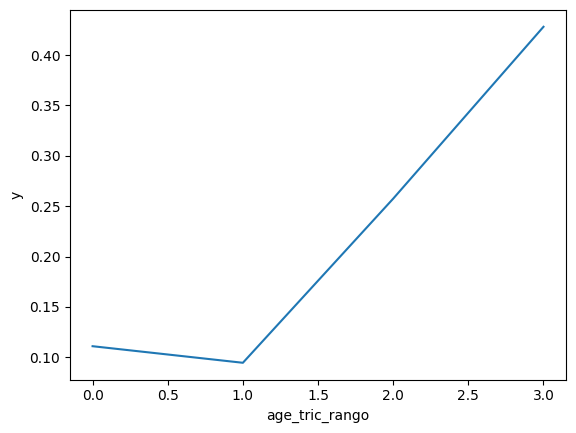

In [51]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'age_tric'
temp = train.copy()
temp[var]=temp[var]**4
# POLINOMIAL DE GRADO 4: age_tric4
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-52-505f90374c7c>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='balance_tric_rango', ylabel='y'>

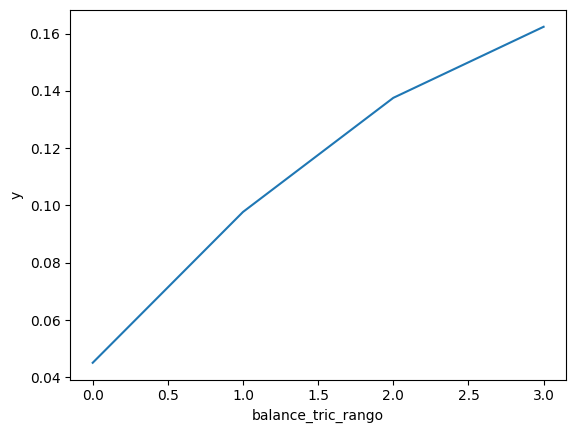

In [52]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'balance_tric'
temp = train.copy()
temp[var]=temp[var]
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-53-b7a25b407e4f>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='day_tric_rango', ylabel='y'>

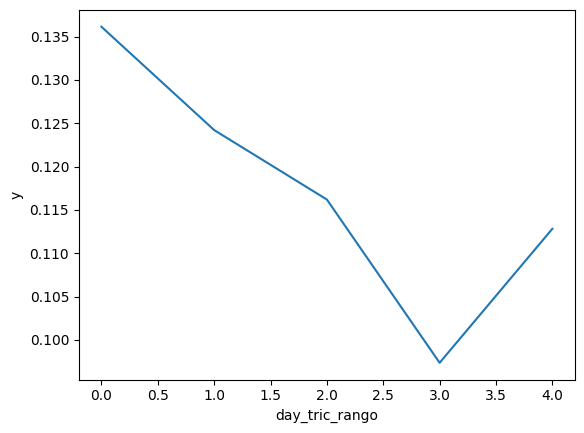

In [53]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'day_tric'
temp = train.copy()
temp[var]=temp[var]**1
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =5,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-54-99165da6ea51>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='campaign_tric_rango', ylabel='y'>

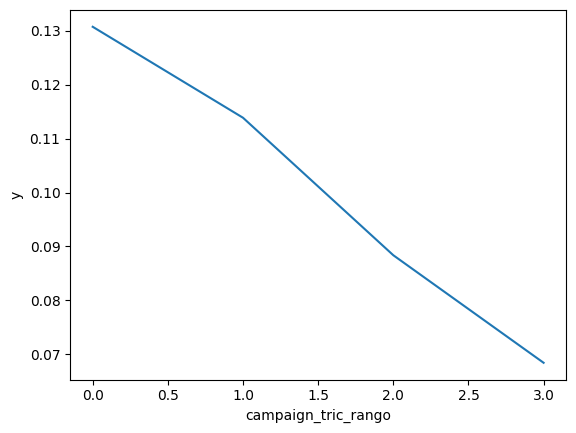

In [54]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'campaign_tric'
temp = train.copy()
temp[var]=temp[var]
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-55-a03c89747ecc>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:245: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(


<Axes: xlabel='pdays_tric_rango', ylabel='y'>

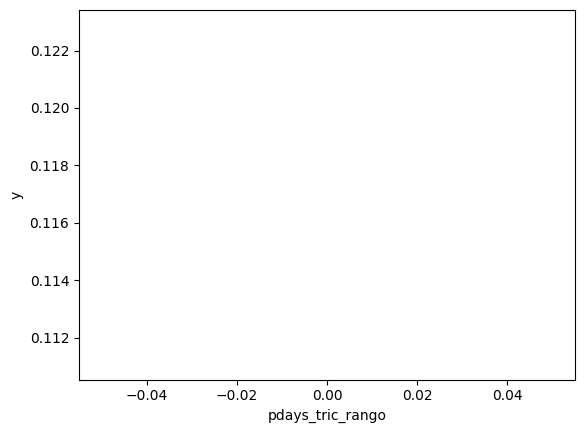

In [55]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'pdays_tric'
temp = train.copy()
temp[var]=temp[var]
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

<ipython-input-56-b98a5fc12ed7>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='duration_tric_rango', ylabel='y'>

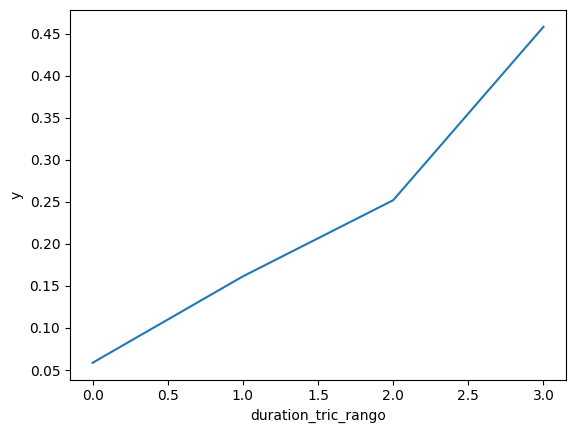

In [56]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'duration_tric'
temp = train.copy()
temp[var]=temp[var]**2
# polinomial de grado 2: duration_tric2
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins =4,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'y': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'y')

**completar**

In [57]:
variables_numericas_ric

['age_tric',
 'balance_tric',
 'day_tric',
 'duration_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric']

In [58]:
# TRANSFORMACIÓN POLINOMIAL EN TRAIN DE ALGUNAS VARAIBLES NUMERICAS
train["age_tric4"]=train["age_tric"]**4
train["duration_tric2"]=train["duration_tric"]**2


# TRANSFORMACIÓN POLINOMIAL EN TEST DE ALGUNAS VARAIBLES NUMERICAS
test["age_tric4"]=test["age_tric"]**4
test["duration_tric2"]=test["duration_tric"]**2

In [59]:
variables_numericas_ric.remove("age_tric")
variables_numericas_ric.remove('duration_tric')
variables_numericas_ric.append("age_tric4")
variables_numericas_ric.append("duration_tric2")
variables_numericas_ric

['balance_tric',
 'day_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'age_tric4',
 'duration_tric2']

In [60]:
# analisis de la realcion entre variables categoricas y target. Seleccion:

from scipy.stats import chi2_contingency

# Prueba de chi-cuadrado para evaluar la asociación
for variable in categorical_features_coded:
    crosstab = pd.crosstab(train[variable], train["y"])
    chi2, p_value, _, _ = chi2_contingency(crosstab)
    print(f"Variable: {variable}")
    print(f"Estadístico de chi-cuadrado: {chi2}")
    print(f"Valor p: {round(p_value,5)}\n")

Variable: marital_coded
Estadístico de chi-cuadrado: 142.85854765355052
Valor p: 0.0

Variable: education_coded
Estadístico de chi-cuadrado: 165.63541610530604
Valor p: 0.0

Variable: default_coded
Estadístico de chi-cuadrado: 18.506484755587188
Valor p: 2e-05

Variable: housing_coded
Estadístico de chi-cuadrado: 595.0995298330809
Valor p: 0.0

Variable: loan_coded
Estadístico de chi-cuadrado: 141.89460969186968
Valor p: 0.0

Variable: contact_coded
Estadístico de chi-cuadrado: 711.2973278618297
Valor p: 0.0

Variable: month_coded
Estadístico de chi-cuadrado: 2150.9912722842596
Valor p: 0.0

Variable: poutcome_coded
Estadístico de chi-cuadrado: 3057.217270673017
Valor p: 0.0

Variable: financial-stability_coded
Estadístico de chi-cuadrado: 342.5922012654127
Valor p: 0.0



**Anáisis bivariado entre variable categoricas y el target**

Con un nivel de significancia del 5% se concluye que:
Existe una realción o asociatividad entre las variables categoricas y la variable objetivo. Es decir, esta reliación no es por el azar.


## Tratamiento de Missing

In [61]:
train = train.fillna(train.median())
test  = test.fillna(train.median())

<ipython-input-61-b1ef414424de>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.median())
<ipython-input-61-b1ef414424de>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test  = test.fillna(train.median())


## Pre-Selección de Variables

In [62]:
numerical_features = variables_numericas

In [63]:
variables_numericas_ric

['balance_tric',
 'day_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'age_tric4',
 'duration_tric2']

In [66]:
## Pre-Selección de Variables usando el GINI

from sklearn.metrics import roc_auc_score

dfgini = pd.DataFrame({'feature': variables_numericas_ric + categorical_features_coded,
                       'gini': [roc_auc_score(train.y, train[col])*2-1 for col in variables_numericas_ric + categorical_features_coded]})

dfgini['gini_abs'] = dfgini.gini.apply(lambda x: abs(x))

dfgini.sort_values(by = 'gini_abs', ascending = False)

,feature,gini,gini_abs
6,duration_tric2,0.612573,0.612573
13,month_coded,0.306552,0.306552
14,poutcome_coded,0.225030,0.225030
12,contact_coded,0.214510,0.214510
10,housing_coded,0.212155,0.212155
0,balance_tric,0.174030,0.174030
15,financial-stability_coded,0.160436,0.160436
2,campaign_tric,-0.138345,0.138345
8,education_coded,0.118132,0.118132
7,marital_coded,0.103978,0.103978


**ANalisis de la Relación entre Varaibles y el Target**

***Un mayor Gini de la variable explicativa indica una mayor asociatividad con la variable Objetivo***.

Es decir la variable de entrada explica mejor el comportamiento de la variable objetivo.

>Variables sin relacion con la variable objetivo Y: pdays_tric, previous_tric

>Variables con relacion inversa o negativa con la variable objetivo Y: campaign_tric, day_tric,age_tric4

>Variables con relacion directa o positiva: el resto de variables

In [68]:
univariate = train[variables_numericas_ric + categorical_features_coded].describe().transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '25%': 'Q1',
                             '50%' : 'median',
                            '75%': 'Q3'}, inplace = True)
univariate

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,balance_tric,31647.0,9.409509e+02,1.188414e+03,-1979.500000,7.100000e+01,4.510000e+02,1.438000e+03,3.488500e+03,0.0
1,day_tric,31647.0,1.580826e+01,8.335407e+00,1.000000,8.000000e+00,1.600000e+01,2.100000e+01,3.100000e+01,0.0
2,campaign_tric,31647.0,2.390843e+00,1.598883e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,0.0
3,pdays_tric,31647.0,-1.000000e+00,0.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.0
4,previous_tric,31647.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
5,age_tric4,31647.0,3.986741e+06,4.247396e+06,104976.000000,1.185921e+06,2.313441e+06,5.308416e+06,2.470339e+07,0.0
6,duration_tric2,31647.0,8.664148e+04,1.200240e+05,0.000000,1.060900e+04,3.240000e+04,1.017610e+05,4.134490e+05,0.0
7,marital_coded,31647.0,1.169779e-01,2.159392e-02,0.100620,1.006197e-01,1.006197e-01,1.496485e-01,1.496485e-01,0.0
8,education_coded,31647.0,1.169779e-01,2.325171e-02,0.083944,1.065407e-01,1.065407e-01,1.488908e-01,1.488908e-01,0.0
9,default_coded,31647.0,1.169779e-01,7.890326e-03,0.059028,1.180522e-01,1.180522e-01,1.180522e-01,1.180522e-01,0.0


In [69]:
univariate_II = pd.merge(univariate, dfgini, on = 'feature', how = 'left')
univariate_II.sort_values(by = 'gini_abs', ascending = False)

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,gini,gini_abs
6,duration_tric2,31647.0,8.664148e+04,1.200240e+05,0.000000,1.060900e+04,3.240000e+04,1.017610e+05,4.134490e+05,0.0,0.612573,0.612573
13,month_coded,31647.0,1.169779e-01,8.379104e-02,0.068298,6.829776e-02,9.858388e-02,1.118421e-01,5.177515e-01,0.0,0.306552,0.306552
14,poutcome_coded,31647.0,1.169779e-01,9.989447e-02,0.091930,9.192964e-02,9.192964e-02,9.192964e-02,6.458333e-01,0.0,0.225030,0.225030
12,contact_coded,31647.0,1.169779e-01,4.818412e-02,0.041028,4.102790e-02,1.483337e-01,1.483337e-01,1.483337e-01,0.0,0.214510,0.214510
10,housing_coded,31647.0,1.169779e-01,4.410485e-02,0.077548,7.754847e-02,7.754847e-02,1.663110e-01,1.663110e-01,0.0,0.212155,0.212155
0,balance_tric,31647.0,9.409509e+02,1.188414e+03,-1979.500000,7.100000e+01,4.510000e+02,1.438000e+03,3.488500e+03,0.0,0.174030,0.174030
15,financial-stability_coded,31647.0,1.169779e-01,3.344006e-02,0.085622,8.562183e-02,1.070189e-01,1.440371e-01,2.482436e-01,0.0,0.160436,0.160436
2,campaign_tric,31647.0,2.390843e+00,1.598883e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,0.0,-0.138345,0.138345
8,education_coded,31647.0,1.169779e-01,2.325171e-02,0.083944,1.065407e-01,1.065407e-01,1.488908e-01,1.488908e-01,0.0,0.118132,0.118132
7,marital_coded,31647.0,1.169779e-01,2.159392e-02,0.100620,1.006197e-01,1.006197e-01,1.496485e-01,1.496485e-01,0.0,0.103978,0.103978


In [70]:
print(len(univariate_II.feature.tolist()))
univariate_II.feature.tolist()

16


['balance_tric',
 'day_tric',
 'campaign_tric',
 'pdays_tric',
 'previous_tric',
 'age_tric4',
 'duration_tric2',
 'marital_coded',
 'education_coded',
 'default_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded']

In [71]:
#Seleccion de Variables
# Eliminamos las que tienen un GINI <5% , es decir tienen poca asociatividad con el target
# Como el dataset no tiene missing , no es distriminatorio

print('initial features: ' + str(len(univariate_II)))
print('selected features: ' + str(len(univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)])))
final_features = univariate_II.loc[(univariate_II.gini_abs >= 0.05) & (univariate_II.missing_rate <= 0.50)].feature.tolist()

initial features: 16
selected features: 12


**Observación:**

Se eliminó 4 variables de enttrada que no tenian una marcada asociación con el target, lo cual se observó en sus GINI< 5%

Las variables eliminadas fueron: previous_tric,pdays_tric,age_tric4, default_coded, day_tric

In [72]:
print("Cantidad de Variables explicativas totales: ",len(final_features))
final_features

Cantidad de Variables explicativas totales:  12


['balance_tric',
 'day_tric',
 'campaign_tric',
 'duration_tric2',
 'marital_coded',
 'education_coded',
 'housing_coded',
 'loan_coded',
 'contact_coded',
 'month_coded',
 'poutcome_coded',
 'financial-stability_coded']

### Estandarización

In [73]:
train[[x + '_std' for x in final_features]] = (train[final_features] - train[final_features].mean())/train[final_features].std()
test[[x + '_std' for x in final_features]] = (test[final_features] - train[final_features].mean())/train[final_features].std()

In [81]:
final_features_std=list()
for var in final_features:
  final_features_std.append(var+"_std")
print(len(final_features_std))
final_features_std

12


['balance_tric_std',
 'day_tric_std',
 'campaign_tric_std',
 'duration_tric2_std',
 'marital_coded_std',
 'education_coded_std',
 'housing_coded_std',
 'loan_coded_std',
 'contact_coded_std',
 'month_coded_std',
 'poutcome_coded_std',
 'financial-stability_coded_std']

Las 12 variables finales, se estandarizaron correctamente

## Regresión Logística

In [75]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.Logit(train.y,
                sm.add_constant(train[final_features_std]))
 #              sm.add_constant(train[[x + '_std' for x in final_features]]))

res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.238005
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31634
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.3405
Time:                        06:49:11   Log-Likelihood:                -7532.1
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.8735      0.030    -94.602      0.

In [76]:
final_features_std

['balance_tric_std',
 'day_tric_std',
 'campaign_tric_std',
 'duration_tric2_std',
 'marital_coded_std',
 'education_coded_std',
 'housing_coded_std',
 'loan_coded_std',
 'contact_coded_std',
 'month_coded_std',
 'poutcome_coded_std',
 'financial-stability_coded_std']

#Observaciones
**Analisis de la constante**

  0. La constante "const" tiene un valor pequeño (-2.8778) lo cual indica que el modelo logra un buen ajuste. La probabilidad base de que un cliente se suscribaa a un depósito a plazo fijo.

**Analisis de las Variables Explicativas**

1. **"campaign":** Número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto).

  Por cada llamada adicional al mismo cliente la probabilidad de que el cliente acepte invertir en un depósito a plazo fijo disminuye (-0.2025).
2. **duration**: Duración del último contacto en segundos (numérico).
  Por cada segundo adicional en la duración, la probabidad que el cliente se suscriba aun depósito a plazo fijo se incrementa en (1.06). Es decir si el cliente muestra mayor tiempo de interes en la información del producto, se recomienda cerrar el trato del depósito a plazo fijo.

In [82]:
final_features_std.remove("day_tric_std")
final_features_std
mod = sm.Logit(train.y, sm.add_constant(train[final_features_std]))
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.238058
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31635
Method:                           MLE   Df Model:                           11
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.3403
Time:                        06:50:54   Log-Likelihood:                -7533.8
converged:                       True   LL-Null:                       -11420.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.8718      0.030    -94.671      0.

**correlaciones**

### Performance

In [78]:
from sklearn.metrics import *

In [83]:
# Usando el modelo para predecir
train_II = train.copy()
test_II  = test.copy()

train_II['probability'] = res.predict(sm.add_constant(train[final_features_std]))
test_II['probability']  = res.predict(sm.add_constant(test[final_features_std]))

train_II['prediction'] = train_II['probability'].apply(lambda x: 1 if x >= 0.5 else 0)
test_II['prediction']  = test_II['probability'].apply(lambda x: 1 if x > 0.5 else 0)
test_II.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,marital_coded_std,education_coded_std,housing_coded_std,loan_coded_std,contact_coded_std,month_coded_std,poutcome_coded_std,financial-stability_coded_std,probability,prediction
5971,27,married,secondary,no,953,yes,no,unknown,26,may,...,-0.757539,-0.448881,-0.893993,0.437940,-1.576246,-0.580971,-0.250747,0.809184,0.022035,0
32893,29,single,secondary,no,441,yes,no,cellular,17,apr,...,1.512952,-0.448881,-0.893993,0.437940,0.650750,0.946098,-0.250747,-0.937680,0.044195,0
33927,34,married,primary,no,7468,yes,yes,cellular,30,apr,...,-0.757539,-1.420713,-0.893993,-2.283344,0.650750,0.946098,-0.250747,-0.297815,0.090597,0
44865,29,single,secondary,no,1055,no,no,cellular,23,sep,...,1.512952,-0.448881,1.118541,0.437940,0.650750,3.879306,0.056446,-0.937680,0.620718,1
23448,43,divorced,secondary,no,-278,no,no,cellular,28,aug,...,0.238060,-0.448881,1.118541,0.437940,0.650750,-0.061293,-0.250747,-0.297815,0.025156,0


In [84]:
# AUC
print('TRAIN AUC: %f' %(roc_auc_score(train.y, train_II.probability)))
print('TEST AUC: %f' %(roc_auc_score(test.y, test_II.probability)))

TRAIN AUC: 0.903168
TEST AUC: 0.907357


**La métrica AUC** es similar en el test y train y ligeramente mayor.
Esto es bueno porque nos indica que el modelo ha aprendido bien los patrones de la data de entrenamiento.
Además, como son similares no hay preocupación de Overfitting.
Por lo anterior, el GINI será cercano a 1


In [85]:
# GINI
print('TRAIN GINI: %f' %(roc_auc_score(train.y, train_II.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(test.y, test_II.probability)*2-1))

TRAIN GINI: 0.806336
TEST GINI: 0.814713


**La métrica GINI** es similar en el test y train y ligeramente mayor.
Esto es bueno porque nos indica que el modelo ha aprendido bien los patrones de la data de entrenamiento.
Además, como son similares no hay preocupación de Overfitting.


In [86]:
# ACCURACY
from sklearn.metrics import accuracy_score

print('TRAIN ACCURACY: %f' %(accuracy_score(train.y, train_II.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(test.y, test_II.prediction)))

TRAIN ACCURACY: 0.897652
TEST ACCURACY: 0.896859


**La métrica  ACCURACY** es similar y ligeramente mayor en test que en train. Esto significa que el modelo ha aprendido patrones útiles en los datos de entrenamiento y es capaz de aplicar esos patrones de manera efectiva en datos no vistos (conjunto de prueba)

In [87]:
# PRECISION
from sklearn.metrics import precision_score
print('TRAIN PRECISION: %f' %(precision_score(train.y, train_II.prediction)))
print('TEST PRECISION: %f' %(precision_score(test.y, test_II.prediction)))

TRAIN PRECISION: 0.608329
TEST PRECISION: 0.602174


**La métrica  PRECISION**
Esta métrica es importante por el tipo de problema a resolver : ¿El cliente aceptará o no suscribirse en un depósito a plazo fijo? (yes/no)

Nuestro modelo , del total de prediciones como cierta, por cada 100 casos pedichos como positivos, acierta en 60 casos positivos.

Esto es bueno para campañas de venta o marketing porque se puede confiar que la inversión en la campaña de marketing nos dara un buen resultado economico.

Lo contrario, una precisión baja, indicaría que nuestro modelo no es bueno prediciendo. Por tanto se incurria en inversiones con poco o bajo retorno de inversión.


In [88]:
# RECALL
print('TRAIN RECALL: %f' %(recall_score(train.y, train_II.prediction)))
print('TEST RECALL: %f' %(recall_score(test.y, test_II.prediction)))

TRAIN RECALL: 0.351162
TEST RECALL: 0.349086


In [89]:
# F1-SCORE
print('TRAIN F1-SCORE: %f' %(f1_score(train.y, train_II.prediction)))
print('TEST F1-SCORE: %f' %(f1_score(test.y, test_II.prediction)))

TRAIN F1-SCORE: 0.445282
TEST F1-SCORE: 0.441963


**El F1-Score de la muestra test**, nos indica que ***el modelo tiene un rendimiento moderado para clasificar correctamente*** las instancias positivas.

El F1-Scaore de Test es ligeramente menor que el de Test. Esto indica una menor capacidad de generalizacipon del modelo en el conjunto de test.

In [90]:
confusion_matrix(train.y, train_II.prediction)

array([[27108,   837],
       [ 2402,  1300]])

In [91]:
confusion_matrix(test.y, test_II.prediction)

array([[11611,   366],
       [ 1033,   554]])

In [92]:
# Obtener la matriz de confusión
cm = confusion_matrix(train.y, train_II.prediction)

# Convertir a porcentajes
cm_percent = (cm / cm.sum()) * 100

print(cm_percent)


[[85.65740829  2.64480046]
 [ 7.58997693  4.10781433]]


In [93]:
# Obtener la matriz de confusión
cm = confusion_matrix(test.y, test_II.prediction)

# Convertir a porcentajes
cm_percent = (cm / cm.sum()) * 100

print(cm_percent)

[[85.60159245  2.69831908]
 [ 7.61574757  4.0843409 ]]
